In [2]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
from skimage.feature import graycomatrix, graycoprops
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
def preprocess(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    _, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return binary

In [5]:
contrasts = []
homogeneities = []
energies = []
correlations = []
dissimilarities = []

distances = [1]
angles = [0, np.pi/4, np.pi/2, np.pi*3/4]
def extract_glcm(image):
    glcm = graycomatrix(image=image, distances=distances, angles=angles, levels=256)

    contrast = graycoprops(glcm, 'contrast').mean()
    homogeneity = graycoprops(glcm, 'homogeneity').mean()
    energy = graycoprops(glcm, 'energy').mean()
    correlation = graycoprops(glcm, 'correlation').mean()
    dissimilarity = graycoprops(glcm, 'dissimilarity').mean()

    return contrast, homogeneity, energy, correlation, dissimilarity

In [8]:
train_path = "archive2/training_images/"

labels = []

for file in os.listdir(train_path):
    image_path = os.path.join(train_path, file)

    image = cv2.imread(image_path)

    result = preprocess(image)

    contrast, homogeneity, energy, correlation, dissimilarity = extract_glcm(result)

    contrasts.append(contrast)
    homogeneities.append(homogeneity)
    energies.append(energy)
    correlations.append(correlation)
    dissimilarities.append(dissimilarity)

    label = file.split('.')[0].split('_')[-1]
    labels.append(label)

In [9]:
df = pd.DataFrame({
    'contrasts': contrasts,
    'homogeneities': homogeneities,
    'energies': energies,
    'correlations': correlations,
    'dissimilarities': dissimilarities,
    'labels': labels
})

y = df['labels']
X = df.drop('labels', axis=1)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
accuracies = []
ks = [i for i in range(1, 50)]

In [12]:
x_train.head()

,contrasts,homogeneities,energies,correlations,dissimilarities
11724,713.349553,0.989030,0.789966,0.969983,2.797449
3822,823.870938,0.987330,0.787324,0.965558,3.230866
4084,1511.283084,0.976759,0.740257,0.945912,5.926600
4246,1536.377958,0.976373,0.738285,0.945336,6.025012
3546,771.633914,0.988133,0.790226,0.967410,3.026015


In [13]:
accuracy_max = 0
k_new = -1
for i in range(1, 50):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)

    if (accuracy_max < accuracy):
        accuracy_max = accuracy
        k_new = i

    accuracies.append(accuracy)

    print(f'{i}. {accuracy}')

1. 0.941976679622432
2. 0.9364242087729039
3. 0.9250416435313714
4. 0.9197667962243198
5. 0.9053303720155469
6. 0.899222654081066
7. 0.892282065519156
8. 0.8842309827873404
9. 0.8750694058856191
10. 0.8725707940033315
11. 0.859800111049417
12. 0.8600777345918934
13. 0.8525818989450306
14. 0.8511937812326485
15. 0.8461965574680733
16. 0.8417545807884509
17. 0.8417545807884509
18. 0.8364797334813993
19. 0.8367573570238757
20. 0.8375902276513049
21. 0.8403664630760689
22. 0.8414769572459745
23. 0.8439755691282621
24. 0.8445308162132149
25. 0.8439755691282621
26. 0.8492504164353137
27. 0.8489727928928373
28. 0.8503609106052193
29. 0.8517490283176014
30. 0.8550805108273182
31. 0.8553581343697946
32. 0.8559133814547474
33. 0.8564686285397002
34. 0.8567462520821766
35. 0.8567462520821766
36. 0.8523042754025542
37. 0.851471404775125
38. 0.8545252637423654
39. 0.8550805108273182
40. 0.8545252637423654
41. 0.857023875624653
42. 0.8586896168795114
43. 0.8581343697945586
44. 0.8564686285397002
45.

In [14]:
model = KNeighborsClassifier(n_neighbors=k_new)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

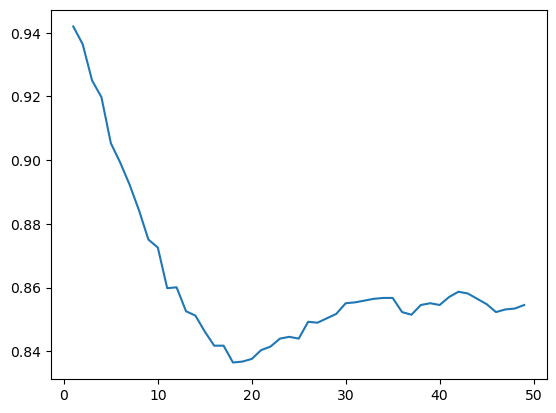

In [15]:
plt.plot(ks, accuracies)
plt.show()

In [16]:
import joblib

joblib.dump(model, 'trained_model_sklearn.pkl')

print('Model saved successfully!')

Model saved successfully!
